In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\MUSTAKIM\Desktop\Internshalla\Property_Price_Churn_Disease_Prediction\Part_A_Property_Price_Prediction\data\data_file.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [20]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [19]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
# or use median
# df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


C:\Users\MUSTAKIM\AppData\Local\Temp\ipykernel_13596\3278119876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [21]:
print("Descriptive statistics:")
df.describe()


Descriptive statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


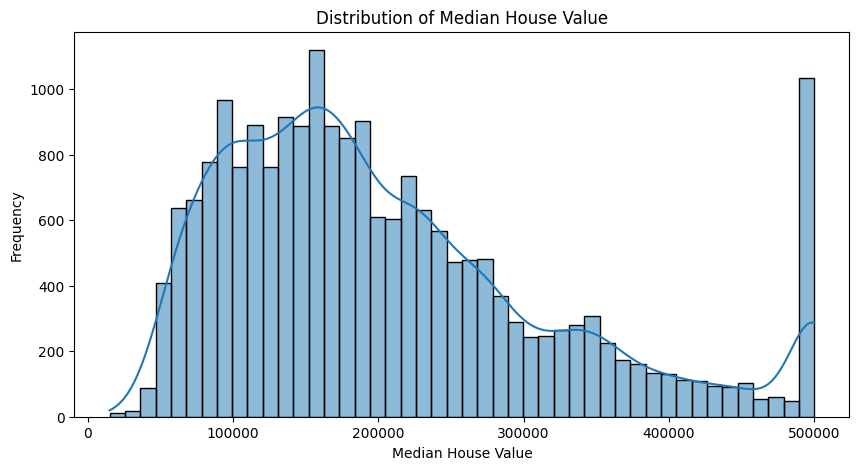

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['median_house_value'], kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


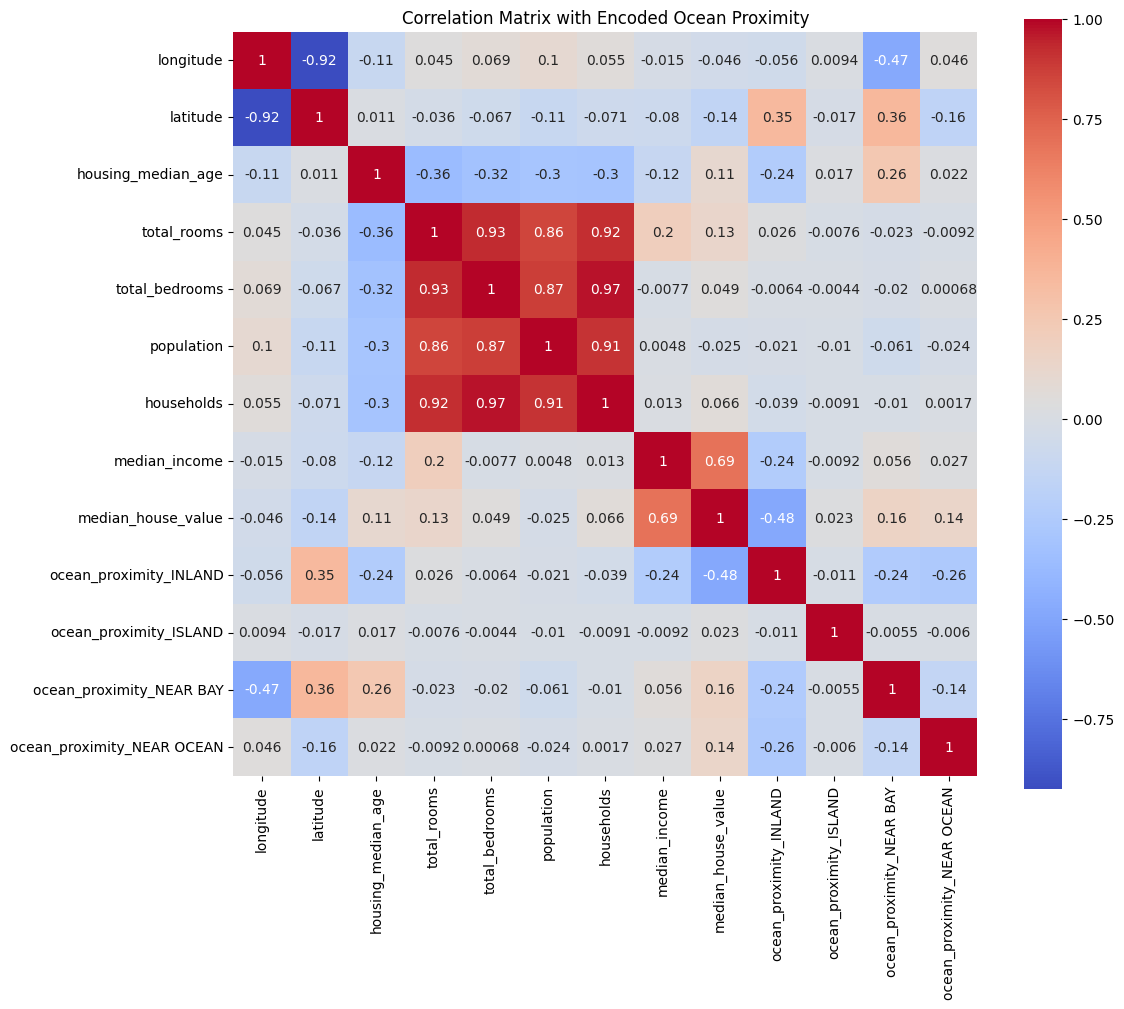

In [23]:
# Perform one-hot encoding on the 'ocean_proximity' column
data_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Calculate correlation matrix with encoded data
correlation_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix with Encoded Ocean Proximity")
plt.show()


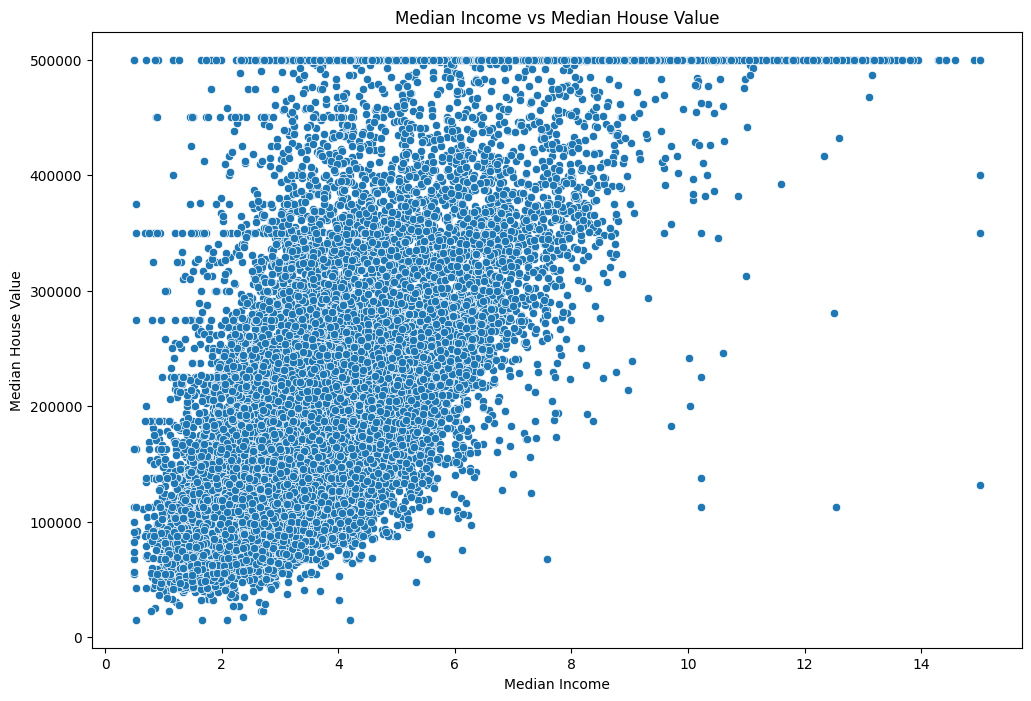

In [24]:
# Scatter plot to assess linearity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='median_income', y='median_house_value')
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


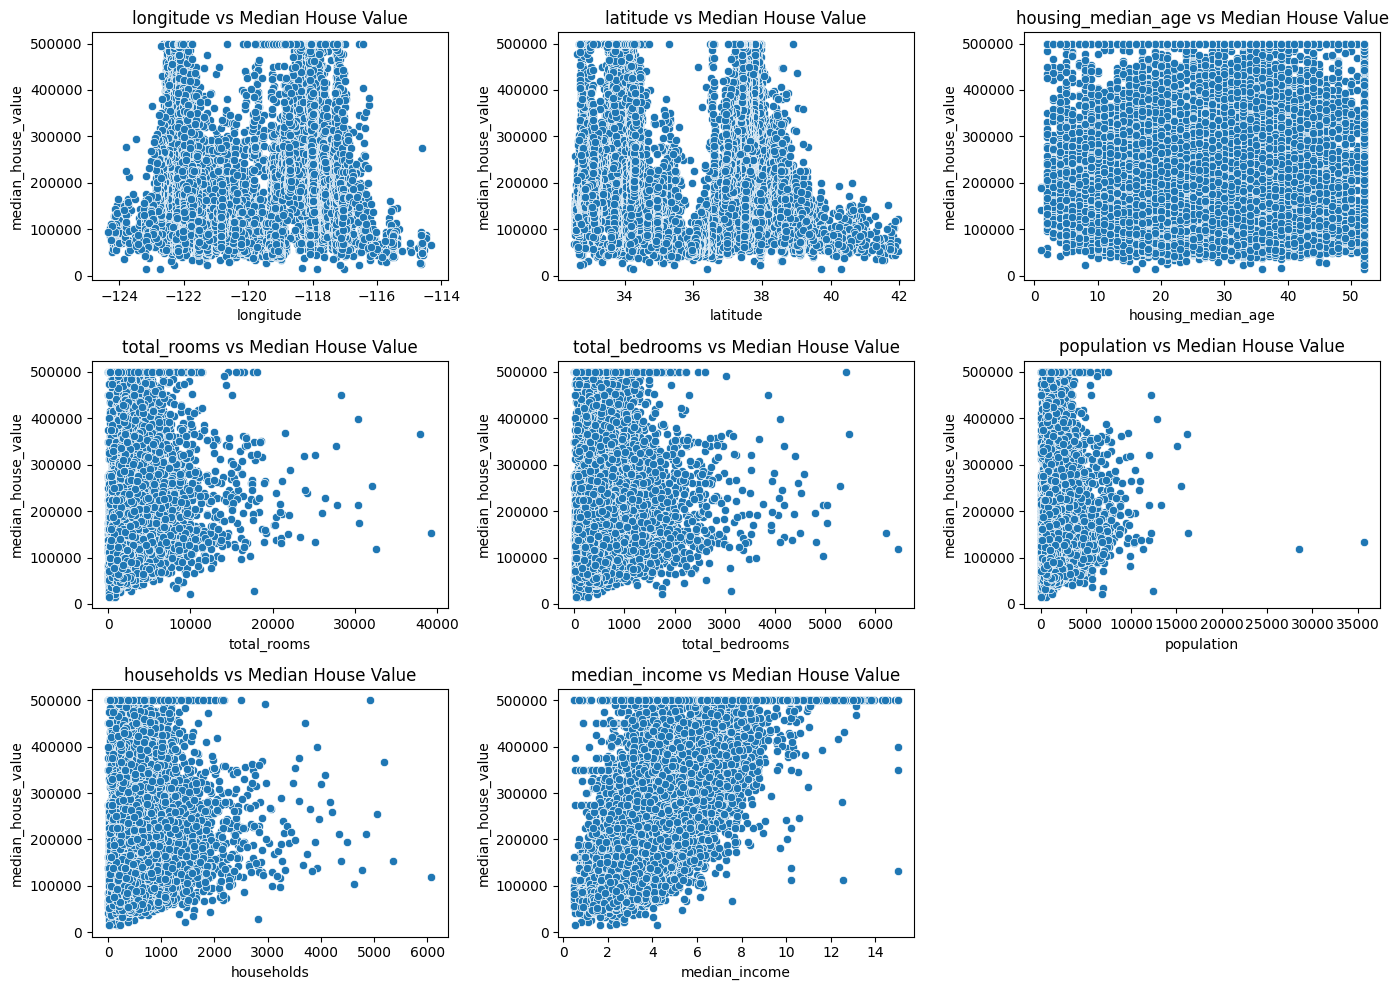

In [25]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y='median_house_value')
    plt.title(f"{feature} vs Median House Value")
plt.tight_layout()
plt.show()


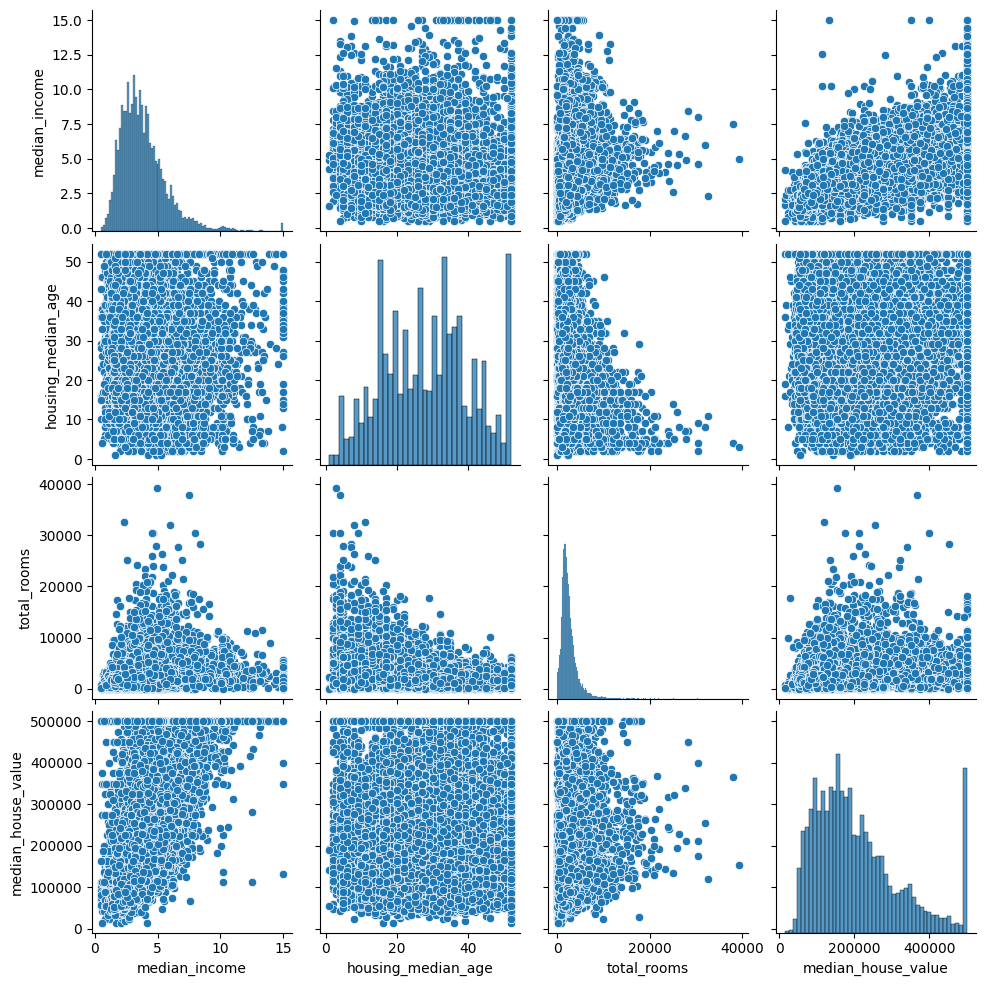

In [26]:
sns.pairplot(df[['median_income', 'housing_median_age', 'total_rooms', 'median_house_value']])
plt.show()


In [27]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample DataFrame with more rows to generalize the approach
# data = pd.DataFrame({
#     'longitude': [-122.23, -122.22, -122.24, -122.25, -122.26],
#     'latitude': [37.88, 37.86, 37.85, 37.84, 37.83],
#     'housing_median_age': [41, 21, 52, 30, 20],
#     'total_rooms': [880, 7099, 1467, 1274, 1627],
#     'total_bedrooms': [129, 1106, 190, 235, 280],
#     'population': [322, 2401, 496, 558, 565],
#     'households': [126, 1138, 177, 219, 259],
#     'median_income': [8.3252, 8.3014, 7.2574, 5.6431, 3.8462],
#     'median_house_value': [452600, 358500, 352100, 341300, 342200],
#     'ocean_proximity': ['NEAR BAY', 'NEAR BAY', 'INLAND', 'NEAR BAY', 'INLAND']
# })

# One-hot encode 'ocean_proximity' and separate the target variable
data_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
X = data_encoded.drop(columns=['median_house_value'])
y = data_encoded['median_house_value']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select top features with F-statistic
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_scaled, y)

# Get feature scores and names, sorted by importance
feature_scores = selector.scores_
feature_names = X.columns
feature_importance = sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)

# Print features sorted by importance
print("Features sorted by importance (highest to lowest):")
for feature, score in feature_importance:
    print(f"{feature}: {score:.2f}")

# Top features
top_features = [feature for feature, score in feature_importance[:3]]
print("\nTop 3 features to use for training:", top_features)


Features sorted by importance (highest to lowest):
median_income: 18556.57
ocean_proximity_INLAND: 6342.90
ocean_proximity_NEAR BAY: 544.19
latitude: 438.01
ocean_proximity_NEAR OCEAN: 423.87
total_rooms: 378.23
housing_median_age: 232.84
households: 89.86
total_bedrooms: 50.60
longitude: 43.70
population: 12.55
ocean_proximity_ISLAND: 11.32

Top 3 features to use for training: ['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Selecting the top features
features = ['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'latitude', 'total_rooms']
X = data_encoded[features]
y = data_encoded['median_house_value']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Print the coefficients for each feature
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")


Mean Squared Error: 5616104009.820664
R^2 Score: 0.571423570574146
Coefficients:
median_income: 36766.7572736917
ocean_proximity_INLAND: -82886.26306793053
ocean_proximity_NEAR BAY: 16047.194371619038
latitude: 259.9556250263822
total_rooms: 1.3511227363487706


In [29]:
import numpy as np
# Apply log transformation to the target variable
y = np.log1p(data_encoded['median_house_value'])


In [30]:
data_encoded['rooms_per_household'] = data_encoded['total_rooms'] / data_encoded['households']
data_encoded['bedrooms_per_room'] = data_encoded['total_bedrooms'] / data_encoded['total_rooms']


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[features] = scaler.fit_transform(data_encoded[features])


In [32]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  # You can tune alpha for better performance
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Mean Squared Error:", mse_ridge)
print("Ridge R^2 Score:", r2_ridge)


Ridge Mean Squared Error: 5616097749.090525
Ridge R^2 Score: 0.5714240483433191


In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 5 features based on their relationship with the target
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_train, y_train)

# Train the model using selected features
model.fit(X_selected, y_train)


LinearRegression()